# TidyTuesday dataset of [2025-08-26](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-08-26)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
billboard = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-26/billboard.csv')
topics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-26/topics.csv')

In [3]:
billboard

song                  artist                  date  \
0           Poor Little Fool            Ricky Nelson  1958-08-04T00:00:00Z   
1     Nel Blu Dipinto Di Blu        Domenico Modugno  1958-08-18T00:00:00Z   
2                Little Star            The Elegants  1958-08-25T00:00:00Z   
3       It's All in the Game           Tommy Edwards  1958-09-29T00:00:00Z   
4     It's Only Make Believe           Conway Twitty  1958-11-10T00:00:00Z   
...                      ...                     ...                   ...   
1172    Please Please Please       Sabrina Carpenter  2024-06-29T00:00:00Z   
1173      A Bar Song (Tipsy)               Shaboozey  2024-07-13T00:00:00Z   
1174           Love Somebody           Morgan Wallen  2024-11-02T00:00:00Z   
1175             squabble up          Kendrick Lamar  2024-12-07T00:00:00Z   
1176        Die with a Smile  Bruno Mars & Lady Gaga  2025-01-11T00:00:00Z   

      weeks_at_number_one  non_consecutive  rating_1  rating_2  rating_3  \
0                       2                0         4         5         3   
1                       5                1         7         7         5   
2                       1                0         5         6         6   
3                       6                0         3         3         7   
4                       2                1         7         8         9   
...                   ...              ...       ...       ...       ...   
1172                    1                0         8         7         8   
1173                   19                1         6         4         9   
1174                    1                0         3         5         5   
1175                    1                0         9        10         9   
1176                    2                0         8         7         4   

      overall_rating  divisiveness  ... featured_in_a_then_contemporary_play  \
0           4.000000      1.333333  ...                                  NaN   
1           6.333333      1.333333  ...                                  NaN   
2           5.666667      0.666667  ...                                  NaN   
3           4.333333      2.666667  ...                                  NaN   
4           8.000000      1.333333  ...                                  NaN   
...              ...           ...  ...                                  ...   
1172        7.666667      0.666667  ...                                  NaN   
1173        6.333333      3.333333  ...                                  NaN   
1174        4.333333      1.333333  ...                                  NaN   
1175        9.333333      0.666667  ...                                  NaN   
1176        6.333333      2.666667  ...                                  NaN   

     written_for_a_film featured_in_a_then_contemporary_film  \
0                     0                                  NaN   
1                     0                                  NaN   
2                     0                                  NaN   
3                     0                                  NaN   
4                     0                                  NaN   
...                 ...                                  ...   
1172                  0                                  NaN   
1173                  0                                  NaN   
1174                  0                                  NaN   
1175                  0                                  NaN   
1176                  0                                  NaN   

     written_for_a_t_v_show featured_in_a_then_contemporary_t_v_show  \
0                         0                                      NaN   
1                         0                                      NaN   
2                         0                                      NaN   
3                         0                                      NaN   
4                         0                                      NaN   
...         

In [4]:
billboard.columns.values

array(['song', 'artist', 'date', 'weeks_at_number_one', 'non_consecutive',
       'rating_1', 'rating_2', 'rating_3', 'overall_rating',
       'divisiveness', 'label', 'parent_label', 'cdr_genre', 'cdr_style',
       'discogs_genre', 'discogs_style', 'artist_structure',
       'featured_artists', 'multiple_lead_vocalists',
       'group_named_after_non_lead_singer', 'talent_contestant',
       'posthumous', 'artist_place_of_origin', 'front_person_age',
       'artist_male', 'artist_white', 'artist_black', 'songwriters',
       'songwriters_w_o_interpolation_sample_credits', 'songwriter_male',
       'songwriter_white', 'artist_is_a_songwriter',
       'artist_is_only_songwriter', 'producers', 'producer_male',
       'producer_white', 'artist_is_a_producer',
       'artist_is_only_producer', 'songwriter_is_a_producer',
       'time_signature', 'keys', 'simplified_key', 'bpm', 'energy',
       'danceability', 'happiness', 'loudness_d_b', 'acousticness',
       'vocally_based', 'bass_base

In [5]:
billboard['date'] = pd.to_datetime(billboard['date'])
# add a new  col date2 having three categories Before 75, 75-2000, After 2000
billboard['date2'] = pd.cut(billboard['date'].dt.year, bins=[0, 1975, 2000, 2025], labels=['Before 1975', '1975-2000', 'After 2000'])
billboard['date2'].value_counts()

date2
1975-2000      484
Before 1975    383
After 2000     310
Name: count, dtype: int64

In [6]:
billboard['simplified_key_mod'] = billboard['simplified_key'].replace('Multiple Keys', 'multi')
sk_values = billboard['simplified_key_mod'].value_counts()
sk_values

simplified_key_mod
C        120
multi     96
G         83
F         76
D         70
E         69
A         67
Db        57
Ab        49
Bb        48
Eb        42
Am        40
Fm        34
Cm        32
Gm        31
Dbm       29
Dm        29
Gb        29
B         29
Bbm       28
Em        27
Ebm       26
Bm        25
Gbm       21
Abm       20
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


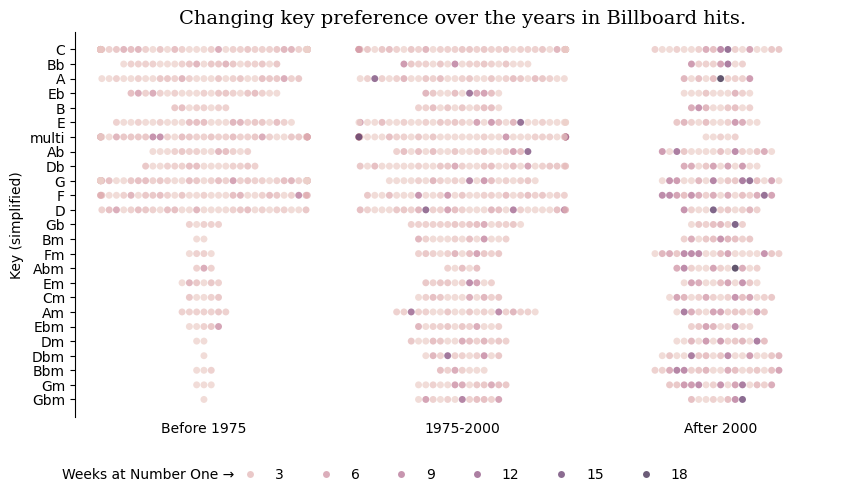

In [21]:
fig,ax = plt.subplots(figsize=(10,5))

sns.swarmplot(data=billboard, x='date2', y='simplified_key_mod', hue='weeks_at_number_one', \
ax=ax, alpha=0.75)
ax.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.2), \
frameon=False, title="")
ax.text(-0.55,29.4, "Weeks at Number One →")
sns.despine(bottom=True)
ax.tick_params(axis='x', which='both', length=0)

plt.xlabel('')
plt.ylabel('Key (simplified)')
plt.title("Changing key preference over the years in Billboard hits.", fontfamily='serif', \
         fontsize=14)
plt.savefig('billboard_hits.png', dpi=300, bbox_inches='tight')
plt.show()


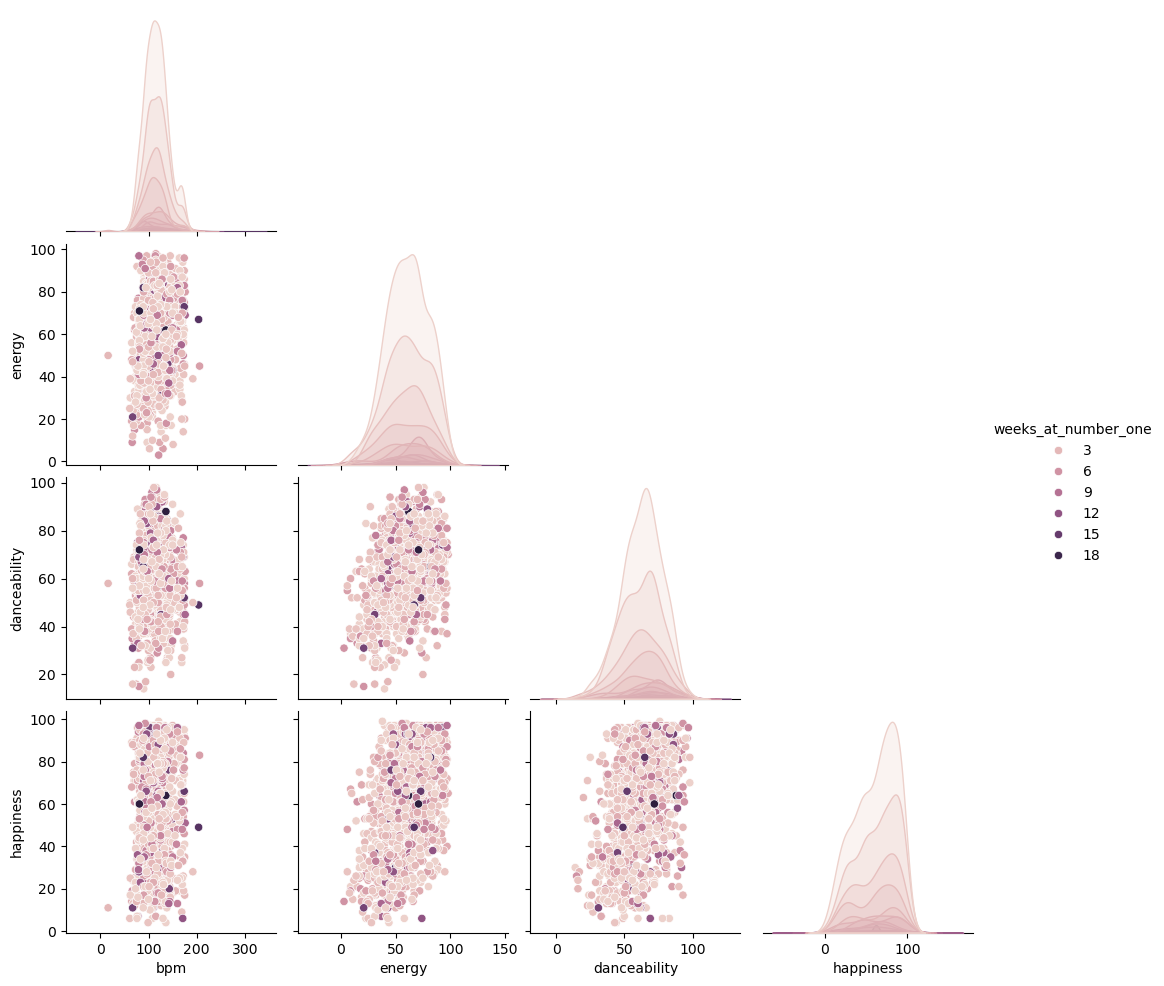

In [8]:
sns.pairplot(billboard[['bpm', 'energy','danceability', 'happiness','weeks_at_number_one']], hue='weeks_at_number_one',\
corner=True)
plt.show()